In [1]:
import numpy as np
import os
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# 리샘플링과 빈도 변환


시계열의 **빈도를 변환** 하는 과정 

    다운 샘플링: 상위 빈도의 데이터를 하위 빈도로 집계

    업 샘플링: 하위 빈도의 데이터를 상위 빈도로 집계 

    둘다 아닌 샘플링들 예) W-WED => W-FRI 로 변환.

resample method =>  빈도변환과 관련된 모든 작업에서 유용하다. groupyby 와 비슷한 api를 가지고 있는데 resample을 호출해서 데이터를 그룹짓고 요약 함수를 적용하는 것이다. 



In [2]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)



randn function makes the dates the index while placing random  floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.

randn 함수는 표준정규분포 (Standard normal distribution)로부터 샘플링된 난수를 반환합니다. 평균 0, 표준 편차 1 의 가우시안 표준 정규 분포 난수를 matrix array(m,n)생성

In [3]:
rng

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14', '2000-01-15', '2000-01-16',
               '2000-01-17', '2000-01-18', '2000-01-19', '2000-01-20',
               '2000-01-21', '2000-01-22', '2000-01-23', '2000-01-24',
               '2000-01-25', '2000-01-26', '2000-01-27', '2000-01-28',
               '2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03', '2000-02-04', '2000-02-05',
               '2000-02-06', '2000-02-07', '2000-02-08', '2000-02-09',
               '2000-02-10', '2000-02-11', '2000-02-12', '2000-02-13',
               '2000-02-14', '2000-02-15', '2000-02-16', '2000-02-17',
               '2000-02-18', '2000-02-19', '2000-02-20', '2000-02-21',
               '2000-02-22', '2000-02-23', '2000-02-24', '2000-02-25',
      

In [4]:
ts

2000-01-01   -0.204708
2000-01-02    0.478943
2000-01-03   -0.519439
2000-01-04   -0.555730
2000-01-05    1.965781
                ...   
2000-04-05    0.795253
2000-04-06    0.118110
2000-04-07   -0.748532
2000-04-08    0.584970
2000-04-09    0.152677
Freq: D, Length: 100, dtype: float64

In [5]:
# mean of each month
ts.resample('M').mean()


2000-01-31    0.304166
2000-02-29   -0.404772
2000-03-31    0.021947
2000-04-30    0.554480
Freq: M, dtype: float64

In [6]:
ts.resample('M', kind='period').mean()

2000-01    0.304166
2000-02   -0.404772
2000-03    0.021947
2000-04    0.554480
Freq: M, dtype: float64

In [7]:
# lets test for the mean of the values in January. 
test = 0 
for d in ts.index:
    if d.month == 1:
        test += ts[d]
test/31

0.304165958408215

이런식으로 큰 시계열 데이터를 처리하기 편하다

|표|resample method 인자|
|:-------|:---------------|
|freq|원하는 리샘플링 빈도를 가리키는 문자열 이나 DateOffset(예:'M','5min',Second(15))|
|axis|리샘프링을 수행할 축. 기본값은 axis=0이다|
|fill_method|업샘플링 시 사용할 보간 방법. fill 과 bfill 이 있다. 기본값은 None이다|
|closed|다운샘플링 시 각 간격의 어느쪽을 포함할지 가리킨다. right와 left가 있고 기본값은 right이다.|
|offset|나뉜 그룹의 라벨을 맞추기 위한 오프셋. -1 은 집계ㅗ딘 라벨을 1초 앞당긴다|
|limit|보간법을 사용할 때 보간을 적용할 최대 기간|
|kind|기간별 혹은 타임스탬프 별로 집계할 것인지 구분 기본값은 시계열 색인의 종류와 같다.|
|convention|기간을 리샘플링할때 하위 빈도 기간에서 상위 빈도로 변환 시의 방식 start or end. 기본값은 end|

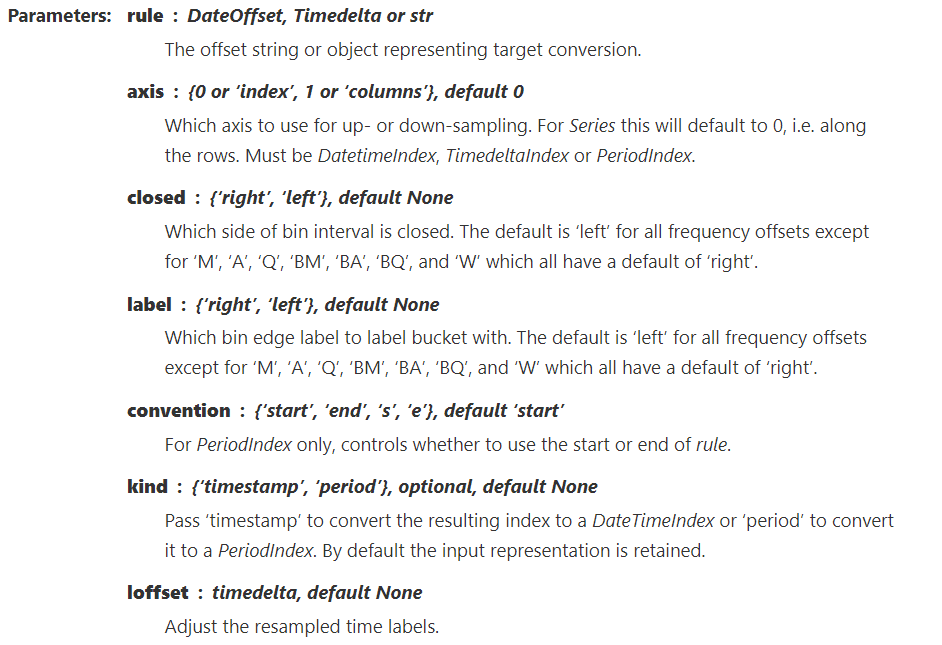

## Downsampling

In [8]:
# label


rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [9]:
ts.resample('5min').sum()


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [10]:
ts.resample('5min', closed='left').sum()


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [11]:
# label stays same. The values are closed at right. 
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [31]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [12]:
# read from the top
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [13]:
# 날짜 라벨에서 1초를 subtract 함
ts.resample('5min', closed='right',label='right', loffset='-1s').sum()

<ipython-input-13-1f45cefb918c>:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

## Open-High-Low-Close (OHLC) resampling


In [14]:
# 시가 open, 고가 high, 저가 low, 종가 close 
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [15]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

## 업샘플링과 보간


In [16]:

frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-12,-0.482573,-0.036264,1.095390,0.980928


In [17]:
# D is for day. There are no additional data for different days
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.482573,-0.036264,1.095390,0.980928


In [18]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-06,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-07,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-08,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-09,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-10,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-11,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-12,-0.482573,-0.036264,1.095390,0.980928


In [19]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-06,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-07,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.482573,-0.036264,1.095390,0.980928


In [20]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.565657,-0.562540,-0.032664,-0.929006
2000-01-13,-0.482573,-0.036264,1.095390,0.980928


## 기간 리샘플링


In [21]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame


,Colorado,Texas,New York,Ohio
2000-01,-0.589488,1.581700,-0.528735,0.457002
2000-02,0.929969,-1.569271,-1.022487,-0.402827
2000-03,0.220487,-0.193401,0.669158,-1.648985
2000-04,-2.252797,-1.166832,0.353607,0.702110
2000-05,-0.274569,-0.139142,0.107657,-0.606545
...,...,...,...,...
2001-08,1.209810,1.270025,-0.974378,-0.634709
2001-09,-0.395701,-0.289436,-0.734297,-0.728505
2001-10,0.838775,0.266893,0.721194,0.910983
2001-11,-1.020903,-1.413416,1.296608,0.252275


In [22]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.589488,1.581700,-0.528735,0.457002
2000-02,0.929969,-1.569271,-1.022487,-0.402827
2000-03,0.220487,-0.193401,0.669158,-1.648985
2000-04,-2.252797,-1.166832,0.353607,0.702110
2000-05,-0.274569,-0.139142,0.107657,-0.606545


In [23]:
# 6월 기준 연간
annual_frame = frame.resample('A-JUN').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.397244,-0.250659,-0.274157,-0.550014
2001,0.237393,0.153602,0.064387,0.073189
2002,0.198668,-0.184490,-0.051345,0.162961


In [24]:
# 12월 기준 연간
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.024752,-0.089078,-0.131906,-0.313531
2001,0.113353,0.025106,0.033542,0.193194


In [25]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()


,Colorado,Texas,New York,Ohio
2000Q1,0.024752,-0.089078,-0.131906,-0.313531
2000Q2,0.024752,-0.089078,-0.131906,-0.313531
2000Q3,0.024752,-0.089078,-0.131906,-0.313531
2000Q4,0.024752,-0.089078,-0.131906,-0.313531
2001Q1,0.113353,0.025106,0.033542,0.193194
2001Q2,0.113353,0.025106,0.033542,0.193194
2001Q3,0.113353,0.025106,0.033542,0.193194
2001Q4,0.113353,0.025106,0.033542,0.193194


In [26]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.024752,-0.089078,-0.131906,-0.313531
2001Q1,0.024752,-0.089078,-0.131906,-0.313531
2001Q2,0.024752,-0.089078,-0.131906,-0.313531
2001Q3,0.024752,-0.089078,-0.131906,-0.313531
2001Q4,0.113353,0.025106,0.033542,0.193194


In [27]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.024752,-0.089078,-0.131906,-0.313531
2000Q2,0.024752,-0.089078,-0.131906,-0.313531
2000Q3,0.024752,-0.089078,-0.131906,-0.313531
2000Q4,0.024752,-0.089078,-0.131906,-0.313531
2001Q1,0.113353,0.025106,0.033542,0.193194
2001Q2,0.113353,0.025106,0.033542,0.193194
2001Q3,0.113353,0.025106,0.033542,0.193194
2001Q4,0.113353,0.025106,0.033542,0.193194


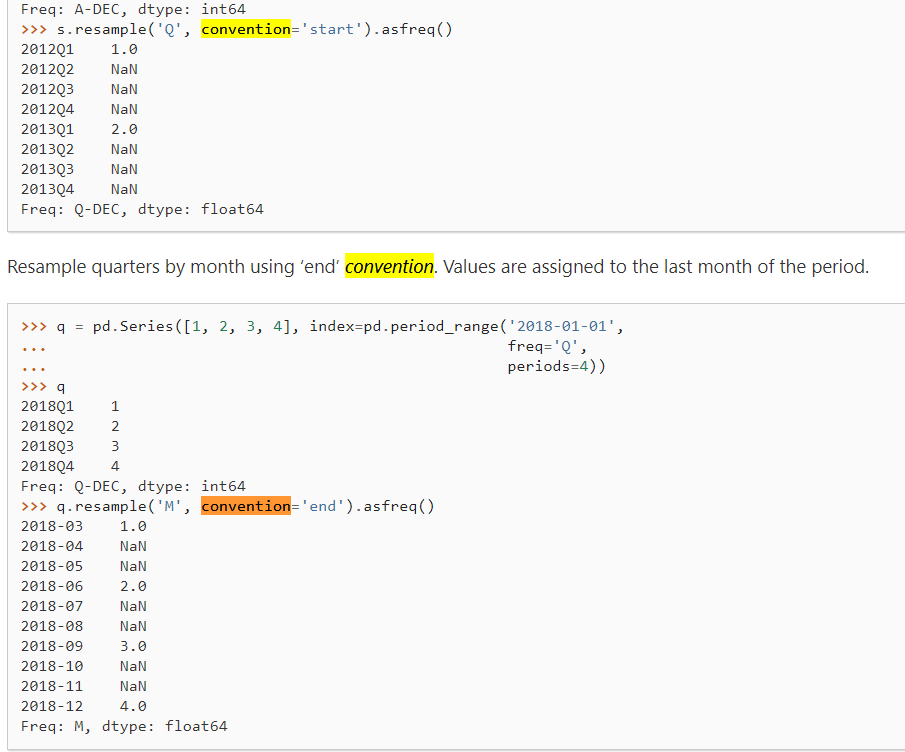

In [28]:
annual_frame.resample('Q-DEC', convention='end').bfill()

,Colorado,Texas,New York,Ohio
2000Q4,0.024752,-0.089078,-0.131906,-0.313531
2001Q1,0.113353,0.025106,0.033542,0.193194
2001Q2,0.113353,0.025106,0.033542,0.193194
2001Q3,0.113353,0.025106,0.033542,0.193194
2001Q4,0.113353,0.025106,0.033542,0.193194


단, 기간의 업샘플링 다운샘플링 경우 엄격하다. 
다운샘플링은 대상의 빈도는 반드시 원본빈도의 하위 기간
업샘플링은 상위기간 이어야 한다. 


In [29]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.024752,-0.089078,-0.131906,-0.313531
2001Q1,0.024752,-0.089078,-0.131906,-0.313531
2001Q2,0.024752,-0.089078,-0.131906,-0.313531
2001Q3,0.024752,-0.089078,-0.131906,-0.313531
2001Q4,0.113353,0.025106,0.033542,0.193194
2002Q1,0.113353,0.025106,0.033542,0.193194
2002Q2,0.113353,0.025106,0.033542,0.193194
2002Q3,0.113353,0.025106,0.033542,0.193194
